In [228]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [229]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
import scikit_posthocs

In [230]:
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [231]:
import scipy.stats
from scipy import stats

In [232]:
df_fifa=pd.read_csv('fifa_stats.csv')
df_fifa.head(5)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


#### 1. Perform the following statistical analysis on the fifa world cup dataset. The dataset consists of player information which includes height, weight overall rating, potential etc. Data Cleaning and basic EDA process needs to be performed. 

##### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size

##### b)	Is there any evidence that the players overall rating is greater than 80?

##### c)	Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

##### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

##### e)	Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

Note: 
1) Perform all the Statistical analysis with 5%(Significance level). 
2) Perform the test of normality and test of variance in the appropriate places.



In [233]:
df_fifa.shape

(2000, 15)

In [234]:
df_fifa.isnull().sum()

Name                         0
Age                          0
Nationality                  0
Overall_rating               0
Potential                    0
Club                        19
Preferred Foot               0
International Reputation     0
Weak Foot                    0
Skill Moves                  0
Work Rate                    0
Position                     0
Jersey Number                0
Height                       0
Weight                       0
dtype: int64

In [235]:
df_fifa['Club'].value_counts()

Chelsea                  24
Liverpool                23
Borussia Dortmund        23
Napoli                   23
Manchester United        23
                         ..
Clube Sport MarÃ­timo     1
Perth Glory               1
Nagoya Grampus            1
Universidad CatÃ³lica     1
SV Zulte-Waregem          1
Name: Club, Length: 285, dtype: int64

In [236]:
df_fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [237]:
df_fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [238]:
df_fifa['Overall_rating'].unique()

array([94, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77,
       76, 75], dtype=int64)

In [239]:
df_fifa['Potential'].unique()

array([94, 93, 92, 91, 90, 89, 95, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79,
       78, 77, 76, 75], dtype=int64)

df_fifa[['Overall_rating','Potential','International Reputation','Weak Foot','Skill Moves']]=df_fifa[['Overall_rating','Potential','International Reputation','Weak Foot','Skill Moves']].astype('object')

In [240]:
df_fifa.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall_rating                int64
Potential                     int64
Club                         object
Preferred Foot               object
International Reputation      int64
Weak Foot                     int64
Skill Moves                   int64
Work Rate                    object
Position                     object
Jersey Number                 int64
Height                      float64
Weight                        int64
dtype: object

In [241]:
df_fifa.describe()

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


<AxesSubplot:>

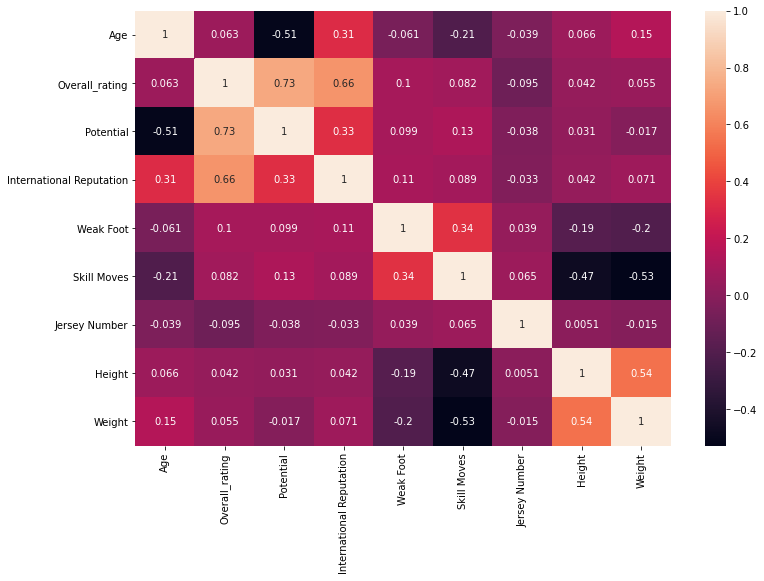

In [242]:
plt.figure(figsize=(12,8))
sns.heatmap(df_fifa.corr(),annot=True)

#### a)	Assuming age as population, perform the central limit theorem with sample size of 200. Find the standard error and the mean of sampling distribution. Compare the results with population mean and standard deviation. Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.


In [243]:
population_a=df_fifa[['Age']]
population_a.head()

,Age
0,31
1,33
2,26
3,27
4,27


In [244]:
sample_a=df_fifa[['Age']].sample(n=200,random_state=1)
print('Sample is selected: ',sample_a.head())

Sample is selected:        Age
674    27
1699   30
1282   30
1315   24
1210   23


In [245]:
n=len(sample_a)
print('Sampe size: ',n)

Sampe size:  200


The null and alternative hypothesis is:

H<sub>0</sub>: mu  = 27                       
H<sub>1</sub>: mu != 27

In [246]:
population_mean_a=population_a.mean()
print('Population Mean is: ',population_mean_a[0])
print()
population_standard_deviation_a=population_a.std()
print('Standard Deviation of population is: ',population_standard_deviation_a[0])
print()
population_sample_a=len(population_a)
print('Sample size is: ',population_sample_a)
print()
alpha=0.05
print('Alpha: ',alpha)

Population Mean is:  27.2315

Standard Deviation of population is:  3.8590612753574423

Sample size is:  2000

Alpha:  0.05


In [247]:
sample_mean_a=sample_a.mean()
print('Sample Mean is: ',sample_mean_a[0])
print()
sample_standard_deviation_a=sample_a.std()
print('Standard Deviation of sample is: ',sample_standard_deviation_a[0])
print()
sample_size_a=len(sample_a)
print('Sample size is: ',sample_size_a)

Sample Mean is:  27.35

Standard Deviation of sample is:  3.868114729139888

Sample size is:  200


In [248]:
z_cal=(sample_mean_a-population_mean_a)/(population_standard_deviation_a/np.sqrt(sample_size_a))
print('Calculated vale of Z: ',z_cal[0])

Calculated vale of Z:  0.4342618455201666


In [249]:
z_score=stats.norm.isf(alpha/2)
print('Z score: ',z_score)

Z score:  1.9599639845400545


Critical Region:If calculated value of Z is less than Z score value then accept Ho.Oterwise reject.

Here calculated value of Z is less than Z score value Hence we accept Ho at 5% l.o.s

#### Conclusion:population mean is 27.

In [250]:
sample_standard_error=sample_standard_deviation_a/(np.sqrt(sample_size_a))
print('Standard Error for sample is: ',sample_standard_error[0])

Standard Error for sample is:  0.27351701553823804


As the sample size (i.e value of n) increases standard error goes on decreasing.


--------------------------------

#### b) Is there any evidence that the players overall rating is greater than 80?

In [251]:
df_fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,5,5,High/ Medium,LW,10,5.750000,150
3,De Gea,27,Spain,91,93,Manchester United,Right,4,3,1,Medium/ Medium,GK,1,6.333333,168
4,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,5,4,High/ High,RCM,7,5.083333,154


In [252]:
population_b=df_fifa[['Overall_rating']]
population_b.head(2)

,Overall_rating
0,94
1,94


In [253]:
population_mean_b=population_b.mean()
print('Population Mean is: ',population_mean_b[0])
print()
population_standard_deviation_b=population_b.std()
print('Population standard deviation is: ',population_standard_deviation_b[0])

Population Mean is:  78.197

Population standard deviation is:  3.2859686235411525


In [254]:
sample_b=population_b.sample(n=100)
sample_b.head(2)


,Overall_rating
1732,75
1536,76


In [255]:
sample_mean_b=sample_b.mean()
print('Sample Mean is: ',sample_mean_b[0])
print()
sample_standard_deviation_b=sample_b.std()
print('Sample standard deviation is: ',sample_standard_deviation_b[0])
print()
sample_size_b=len(sample_b)
print('Sample size is: ',sample_size_b)

Sample Mean is:  78.35

Sample standard deviation is:  3.4034296427770236

Sample size is:  100


mu=Players Overall rating is 80.

Ho: mu <= 80         Against          H1: mu > 80

In [256]:
mu=80

In [257]:
z_cal=(sample_mean_b-mu)/(population_standard_deviation_b/np.sqrt(sample_size_b))
print('Calculated value of z is: ',z_cal[0])

Calculated value of z is:  -5.021350441934132


In [258]:
z_score=stats.norm.isf(0.05)
print('Z Score value is: ',z_score)

Z Score value is:  1.6448536269514729


Critical region: if calculated value of Z is smaller than z Score Then accept Ho.Oterwise Rjrct.

#### Here calculated value of Z is greater than Z score Henece we reject Ho at 5% L.o.S

#### Conclusion:
    There is evidence that the players overall rating is greater than 80.

-----------------------------

#### c) Perform the statistical test to identify whether preferred foot has any impact on potential. Also, perform the graphical analysis.

In [259]:
df_fifa.head(2)

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,4,5,High/ Low,ST,7,6.166667,183


In [260]:
df_fifa['Potential'].count()

2000

In [261]:
df_fifa['Preferred Foot'].count()

2000

In [262]:
df_fifa['Preferred Foot'].value_counts()

Right    1534
Left      466
Name: Preferred Foot, dtype: int64

In [263]:
df_fifa['Potential'].value_counts().count()

21

In [264]:
table=pd.crosstab(df_fifa['Preferred Foot'],df_fifa['Potential'])

In [265]:
observed_val=table.values
observed_val

array([[ 59,  42,  41,  31,  34,  51,  32,  29,  30,  32,  17,  17,  16,
          9,  13,   6,   1,   4,   0,   2,   0],
       [153, 182, 176, 114, 120, 142, 111, 100, 107,  78,  79,  49,  36,
         32,  18,  15,  11,   5,   4,   1,   1]], dtype=int64)

In [266]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df =20), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 31.4104


Critical Region:If the chi-square value is greater than31.4104 then we reject the null hypothesis.

In [267]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_val, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 29.55053700074528
p-value: 0.07747130218941192
Degrees of freedom: 20
Expected values: [[ 49.396  52.192  50.561  33.785  35.882  44.969  33.319  30.057  31.921
   25.63   22.368  15.378  12.116   9.553   7.223   4.893   2.796   2.097
    0.932   0.699   0.233]
 [162.604 171.808 166.439 111.215 118.118 148.031 109.681  98.943 105.079
   84.37   73.632  50.622  39.884  31.447  23.777  16.107   9.204   6.903
    3.068   2.301   0.767]]


#### Conclusion:
The above output shows that the chi-square test statistic is **less than 31.4104 and the p-value is greater than 0.05**, thus we fail to reject (i.e. accept) the null hypothesis and conclude that the variables **`Preferred Foot`** and **`Potential`** are **independent**.

---------------------------------------------

#### d)	Perform the statistical test to identify the relation between the overall rating and potential. [Assume both are continuous data points].

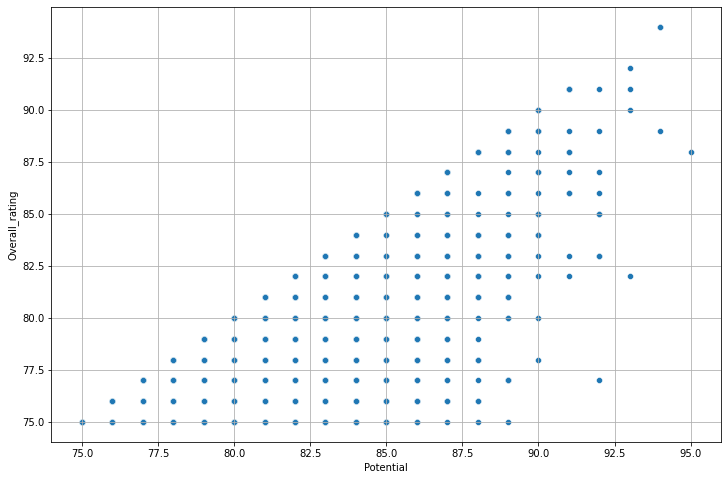

In [268]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_fifa['Potential'],y=df_fifa['Overall_rating'])
plt.grid()

In [269]:
df_fifa[['Overall_rating','Potential']].corr()

,Overall_rating,Potential
Overall_rating,1.000000,0.732695
Potential,0.732695,1.000000


<AxesSubplot:>

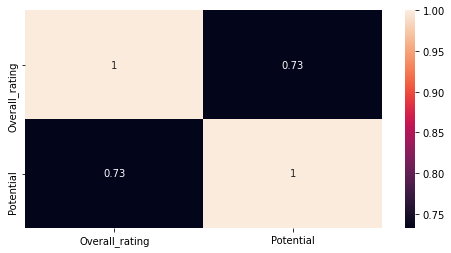

In [270]:
plt.figure(figsize=(8,4))
sns.heatmap(df_fifa[['Overall_rating','Potential']].corr(),annot=True)

#### Conclusion:
 From correlation values we can conclude that There is **strong Positive relation between `Overall rating`** and **`Potential`**.

---------------------------

#### e)Does skill move have any effect in overall rating. Perform the graphical analysis and the statistical analysis.

In [271]:
df_fifa.columns

Index(['Name', 'Age', 'Nationality', 'Overall_rating', 'Potential', 'Club',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Jersey Number', 'Height',
       'Weight'],
      dtype='object')

In [272]:
df_fifa[['Skill Moves']].value_counts()

Skill Moves
3              828
4              544
2              395
1              194
5               39
dtype: int64

In [273]:
df_fifa[['Overall_rating']].value_counts().count()

19

The null and alternative hypothesis is:

H<sub>0</sub>: The variables **Skill Moves** and **Overall_rating** are independent<br>
H<sub>1</sub>: The variables **Skill Moves** and **Overall_rating** are not independent

In [274]:
table=pd.crosstab(df_fifa['Skill Moves'],df_fifa['Overall_rating'])
table

Overall_rating,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94
Skill Moves,,,,,,,,,,,,,,,,,,,
1,38,32,23,15,19,18,5,12,13,7,2,1,1,3,3,1,1,0,0
2,96,78,63,30,24,25,13,20,10,10,12,6,3,2,2,1,0,0,0
3,219,171,138,64,72,56,28,24,17,11,9,4,7,2,3,1,2,0,0
4,74,92,75,59,52,41,43,34,27,13,8,9,1,7,3,2,3,0,1
5,2,0,5,0,4,3,4,4,3,4,2,2,1,3,0,0,0,1,1


In [275]:
observed_val=table.values
observed_val

array([[ 38,  32,  23,  15,  19,  18,   5,  12,  13,   7,   2,   1,   1,
          3,   3,   1,   1,   0,   0],
       [ 96,  78,  63,  30,  24,  25,  13,  20,  10,  10,  12,   6,   3,
          2,   2,   1,   0,   0,   0],
       [219, 171, 138,  64,  72,  56,  28,  24,  17,  11,   9,   4,   7,
          2,   3,   1,   2,   0,   0],
       [ 74,  92,  75,  59,  52,  41,  43,  34,  27,  13,   8,   9,   1,
          7,   3,   2,   3,   0,   1],
       [  2,   0,   5,   0,   4,   3,   4,   4,   3,   4,   2,   2,   1,
          3,   0,   0,   0,   1,   1]], dtype=int64)

In [276]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df =72), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 92.8083


Critical Region:If the chi-square value is greater than31.4104 then we reject the null hypothesis.

In [277]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_val, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 264.3544361441865
p-value: 9.004103479489286e-24
Degrees of freedom: 72
Expected values: [[4.16130e+01 3.61810e+01 2.94880e+01 1.62960e+01 1.65870e+01 1.38710e+01
  9.02100e+00 9.11800e+00 6.79000e+00 4.36500e+00 3.20100e+00 2.13400e+00
  1.26100e+00 1.64900e+00 1.06700e+00 4.85000e-01 5.82000e-01 9.70000e-02
  1.94000e-01]
 [8.47275e+01 7.36675e+01 6.00400e+01 3.31800e+01 3.37725e+01 2.82425e+01
  1.83675e+01 1.85650e+01 1.38250e+01 8.88750e+00 6.51750e+00 4.34500e+00
  2.56750e+00 3.35750e+00 2.17250e+00 9.87500e-01 1.18500e+00 1.97500e-01
  3.95000e-01]
 [1.77606e+02 1.54422e+02 1.25856e+02 6.95520e+01 7.07940e+01 5.92020e+01
  3.85020e+01 3.89160e+01 2.89800e+01 1.86300e+01 1.36620e+01 9.10800e+00
  5.38200e+00 7.03800e+00 4.55400e+00 2.07000e+00 2.48400e+00 4.14000e-01
  8.28000e-01]
 [1.16688e+02 1.01456e+02 8.26880e+01 4.56960e+01 4.65120e+01 3.88960e+01
  2.52960e+01 2.55680e+01 1.90400e+01 1.22400e+01 8.97600e+00 5.98400e+00
  3.53600e+00 4.62400e+00 2.99200e+0

#### Conclusion:
The above output shows that the chi-square test statistic is **greater than 92.8083** and **the p-value is less than 0.05**, thus  **we reject the null hypothesis** and conclude that the variables **`Skill Moves`** and **`Overall_rating`** are **dependent**.

# **-------------------------------------------------------------------------------**

#### 2. Perform the following statistical analysis on the mobile network dataset given. The given data set contains information about the internet, calls, messages of various network. Data Cleaning and basic EDA process needs to be performed. 

#### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.
#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.
#### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.
#### d)	Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.
#### e)	Perform statistical tests to identify the relation between network and network_type. 


--------------------------------------------------------------------------------------------

#### Data Cleaning and basic EDA processing

In [278]:
df_phone=pd.read_csv('Phone.csv')
df_phone.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [279]:
df_phone.dtypes

date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [280]:
df_phone[['date']]=pd.to_datetime(df_phone['date'])

In [281]:
df_phone.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [282]:
df_phone.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [283]:
df_phone.isnull().sum().sum()

0

**There are no null values in Phone dataset.**

In [284]:
df_phone.describe()

,duration
count,820.000000
mean,144.304936
std,45.687777
min,0.993514
25%,112.916486
50%,144.179434
75%,175.932308
max,268.458090


In [285]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          820 non-null    datetime64[ns]
 1   duration      820 non-null    float64       
 2   item          820 non-null    object        
 3   month         820 non-null    object        
 4   network       820 non-null    object        
 5   network_type  820 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 38.6+ KB


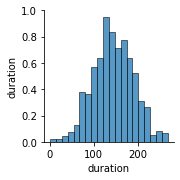

In [286]:
sns.pairplot(df_phone)

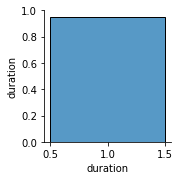

In [287]:
sns.pairplot(df_phone.corr())

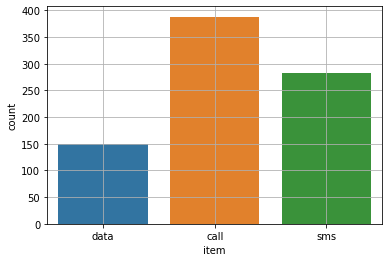

In [288]:
sns.countplot(df_phone['item'])
plt.grid()

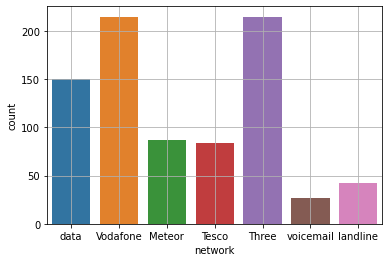

In [289]:
sns.countplot(df_phone['network'])
plt.grid()

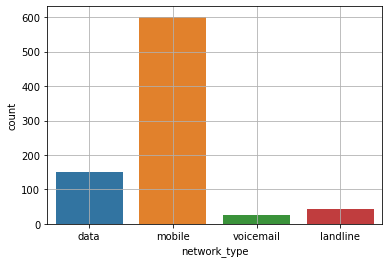

In [290]:
sns.countplot(df_phone['network_type'])
plt.grid()

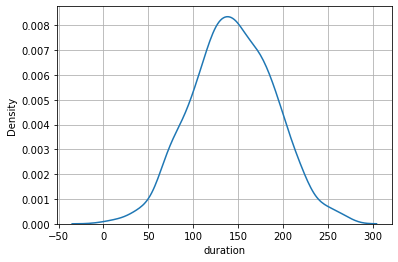

In [291]:
sns.kdeplot(df_phone['duration'])
plt.grid()

# 

#### a) With 95% & 99% Confidence Interval find the range estimate of average duration calls made by all the network. Which of the Intervals are wider? Interpret the results.

**Normality Test:**

H<sub>0</sub>:Duration variable is Normally Distributed.  
H<sub>1</sub>:Duration variable is Not Normally Distributed.  

In [292]:
stats,p_val=scipy.stats.shapiro(df_phone['duration'])
print('P-Value: ',p_val)

P-Value:  0.701244592666626


**Decision Rule:If P-value is greater than 0.05 Then accept Ho.**

##### Here P-Value is greater than 0.05.Hence we accept Ho at 5% Level Of Significance                                

#### Conclusion:
    Duration variable is normally Distributed.

In [293]:
duration_mean=df_phone['duration'].mean()
print('Popualtion Mean: ',duration_mean)

Popualtion Mean:  144.30493555983546


In [294]:
duration_std=df_phone['duration'].std()
print('Popualtion Standard Deviation: ',duration_std)

Popualtion Standard Deviation:  45.68777682571285


In [295]:
sample=df_phone['duration'].sample(n=200,random_state=1)
sample.head(2)

81     171.689887
684    174.764151
Name: duration, dtype: float64

In [296]:
sample_mean=sample.mean()
print('Sample Mean: ',sample_mean)

Sample Mean:  145.64108441469992


In [297]:
n=200
print('Sample size: ',n)

Sample size:  200


#### 95 % Confidence interval :

In [298]:
from scipy import stats

In [299]:
CI_95=stats.norm.interval(0.95,loc=(sample_mean-duration_mean),scale=(duration_std/np.sqrt(n)))
print(CI_95,'is the 95% Confidence Interval for average duration calls    made by all the network.') 

(-4.995737608014541, 7.668035317743464) is the 95% Confidence Interval for average duration calls    made by all the network.


#### 99 % Confidence interval :

In [300]:
CI_99=stats.norm.interval(0.99,loc=sample_mean-duration_mean,scale=duration_std/np.sqrt(n))
print(CI_99,'is the 99 % Confidence Interval for average duration calls    made by all the network.')

(-6.985360533307167, 9.65765824303609) is the 99 % Confidence Interval for average duration calls    made by all the network.


#### Conclusion:
    99 % Confidence Interval is wider than 95 % Confidence Interval.

-----------------------------------

#### b) Perform statistical analysis to check whether the networks are equally distributed in the dataset.

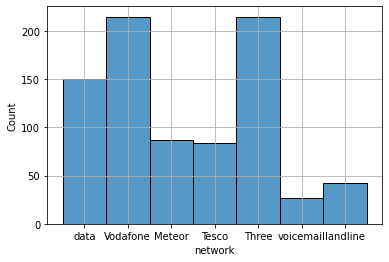

In [301]:
sns.histplot(data=df_phone,x='network')
plt.grid()

H<sub>0</sub>:Networks are equally Distributed.                         
H<sub>1</sub>:Networks are not equally Distributed.

In [302]:
observed_value=df_phone['network'].value_counts()
observed_value

Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
Name: network, dtype: int64

In [303]:
expected_count=len(df_phone)/7
expected_count

117.14285714285714

In [304]:
expected_value=[117,117,117,117,117,117,117]

critical value For ⍺ = 0.05 and degrees of freedom = 6.

In [305]:
chi2_val = round(stats.chi2.isf(q = 0.05, df = 6), 4)

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 12.5916


Critical Region:If the chi-square value is greater than 12.5916 then we reject the null hypothesis.

In [306]:
test_stat, p_value = chisquare(f_obs = observed_value, f_exp = expected_value)

print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 307.7863247863248
p-value: 1.7542899243536984e-63


The above output shows that the chi-square test statistic is greater than 12.5916 and the p-value is less than 0.05, thus, we reject the null hypothesis. 

#### Conclusion:
     Networks are not equally Distributed.

-----------------------------

#### c) Plot the distribution of duration with respect to each network in the same graph and Interpret the results from the graph.

<AxesSubplot:xlabel='network', ylabel='duration'>

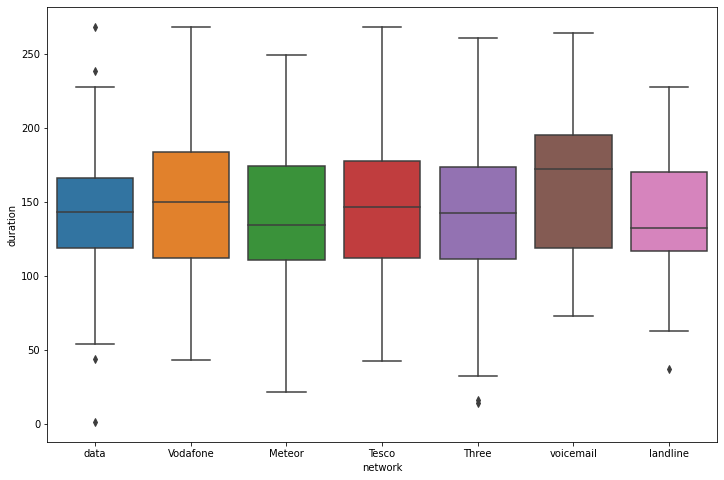

In [307]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_phone['network'],y=df_phone['duration'])


<AxesSubplot:xlabel='network', ylabel='duration'>

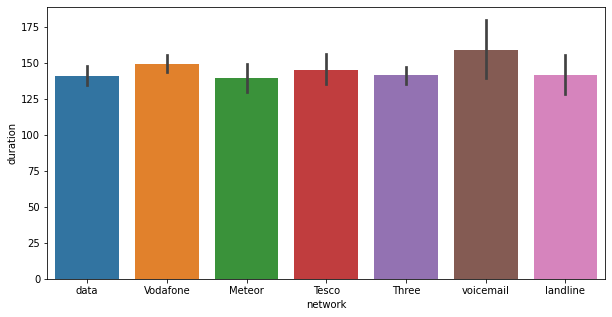

In [308]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_phone['network'],y=df_phone['duration'])

In [309]:
df_phone.groupby('network')[['duration']].describe()

duration                                                            \
             count        mean        std        min         25%         50%   
network                                                                        
Meteor        87.0  139.757012  46.886445  21.456720  110.748469  134.089250   
Tesco         84.0  145.287504  47.187879  42.387325  112.281929  146.733204   
Three        215.0  141.457941  44.744397  14.173899  111.054649  142.534191   
Vodafone     215.0  149.606272  46.912294  43.247843  111.652249  149.709940   
data         150.0  140.968643  41.417421   0.993514  119.070227  143.303965   
landline      42.0  141.617641  46.278411  36.796316  116.794170  131.949186   
voicemail     27.0  159.073841  53.833422  72.779644  118.444467  172.219221   

                                   
                  75%         max  
network                            
Meteor     173.984727  249.265924  
Tesco      177.504493  268.443922  
Three      173.638137  260.813244  
Vodafone   183.478712  268.343460  
data       166.027534  268.458090  
landline   169.973155  227.442595  
voicemail  195.071192  264.422909

## Conclusions:
    1.Voicemail Network has Highest mean duration which is 159.073841.
    2.Voicemail Network has Highest duration standard deviation which is 53.833422.
    3.Data Network has Lowest duration which is 0.993514.
    4.Vodafone Network has Lighest duration which is 268.458090.

--------------------

#### d)Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.


In [310]:
df_phone[['duration']].head()

,duration
0,221.321120
1,81.610599
2,143.109111
3,111.888670
4,246.695171


In [311]:
df_phone[['item']].value_counts()

item
call    388
sms     282
data    150
dtype: int64

H<sub>0</sub>:Duration variable is normally Distributed.             
H<sub>1</sub>:Duration variable is not normally Distributed. 

In [312]:
stat, p_value = stats.shapiro(df_phone['duration'])

print('p-value:', p_value)

p-value: 0.701244592666626


As the p_value is greater than 0.05.We accept H<sub>0</sub>.                                              
Henece Duration variable is normally Distributed.

The null and alternative hypothesis is:

H<sub>0</sub>: The average duration of all item is same<br>
H<sub>1</sub>: At least one item has a different average duration

In [313]:
gr_1=df_phone[df_phone['item']=='call']['duration']

In [314]:
gr_2=df_phone[df_phone['item']=='sms']['duration']

In [315]:
gr_3=df_phone[df_phone['item']=='data']['duration']

In [316]:
f = np.abs(round(stats.f.isf(q = 0.05, dfn = 2, dfd = 817), 4))

print('Critical value for F-test:', f)

Critical value for F-test: 3.0067


In [317]:
test = ols('duration ~ Q("item")', df_phone).fit()

anova_1 = anova_lm(test, typ = 1)

# print the table
anova_1

,df,sum_sq,mean_sq,F,PR(>F)
"Q(""item"")",2.0,8.044792e+03,4022.395964,1.931396,0.145607
Residual,817.0,1.701514e+06,2082.636053,NaN,NaN


The above output shows that the test statistic is less than 3.0067 and the p-value is greater than 0.05. Thus we fail to reject (i.e. accept).

### Conclusion:
    The average duration of all item classes is same.

--------------------------------

#### e)Perform statistical tests to identify the relation between network and network_type. 

In [318]:
df_phone[['network']].value_counts()

network  
Vodafone     215
Three        215
data         150
Meteor        87
Tesco         84
landline      42
voicemail     27
dtype: int64

In [319]:
df_phone[['network_type']].value_counts()

network_type
mobile          601
data            150
landline         42
voicemail        27
dtype: int64

The null and alternative hypothesis is:

H<sub>0</sub>: The variables network and  network_type are independent<br>
H<sub>1</sub>: The variables network and  network_type are not independent

In [320]:
table=pd.crosstab(df_phone['network_type'],df_phone['network'])
table

network,Meteor,Tesco,Three,Vodafone,data,landline,voicemail
network_type,,,,,,,
data,0,0,0,0,150,0,0
landline,0,0,0,0,0,42,0
mobile,87,84,215,215,0,0,0
voicemail,0,0,0,0,0,0,27


In [321]:
observed_value = table.values
observed_value

array([[  0,   0,   0,   0, 150,   0,   0],
       [  0,   0,   0,   0,   0,  42,   0],
       [ 87,  84, 215, 215,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  27]], dtype=int64)

In [322]:
chi2_val = np.abs(round(stats.chi2.isf(q = 0.05, df = 18), 4))

print('Critical value for chi-square test:', chi2_val)

Critical value for chi-square test: 28.8693


i.e. if the chi-square value is greater than 28.8693 then we reject the null hypothesis.

In [323]:
test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 2460.0
p-value: 0.0
Degrees of freedom: 18
Expected values: [[ 15.91463415  15.36585366  39.32926829  39.32926829  27.43902439
    7.68292683   4.93902439]
 [  4.45609756   4.30243902  11.01219512  11.01219512   7.68292683
    2.15121951   1.38292683]
 [ 63.76463415  61.56585366 157.57926829 157.57926829 109.93902439
   30.78292683  19.78902439]
 [  2.86463415   2.76585366   7.07926829   7.07926829   4.93902439
    1.38292683   0.88902439]]


The above output shows that the chi-square test statistic is less than 28.8693 and the p-value is less than 0.05. Thus we reject the null hypothesis.

### Conclusion:
    The variables network and network_type are not independent.

------------------------------------------------------------------

---------------------------------